In [52]:
import pandas as pd

board_games = pd.read_csv('board_games.csv')
print(board_games.shape)
board_games.head()

(81312, 20)


id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0        14383         8.28798               8.14232   
2        210.0    12.0         9262         8.28994               8.06886   
3        240.0    12.0        13294         8.20407               8.05804   
4        150.0    12.0        39883         8.14261               8.04524   

   total_owners  total_traders  total_wanters  total_wishers  total_comments  \
0         26647            372           1219           5865            5347   
1         16519            132           1586           6277            2526   
2         12230             99           1476           5600            1700   
3         14343            362           1084           5075            3378   
4         44362            795            861           5414            9173   

   total_weights  average_weight  
0           2562          3.4785  
1           1423          3.8939  
2            777          3.7761  
3           1642          4.1590  
4           5213          3.2943

In [53]:
# Removing rows with missing values

board_games = board_games.dropna(axis = 0)
print(board_games.shape)


(81268, 20)


In [54]:
# Removing rows with no reviews in the 'users_rated' column
board_games = board_games[board_games['users_rated'] >0]
print(board_games.shape)

(56894, 20)


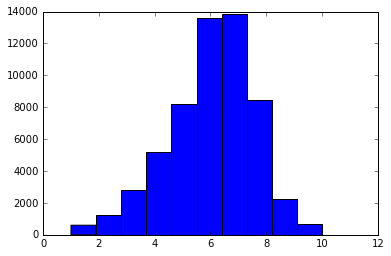

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(board_games['average_rating'])
plt.show()

In [56]:
print('Strandard Deviation: ',board_games["average_rating"].std())
print('Mean: ', board_games["average_rating"].mean())

Strandard Deviation:  1.57882993483
Mean:  6.01611284933


# Error metric

In this data set, using mean squared error as an error metric makes sense. This is because the data is continuous, and follows a somewhat normal distribution. We'll be able to compare our error to the standard deviation to see how good the model is at predictions.

In [57]:
from sklearn.cluster import KMeans

# Initializing the KMeans class with cluster size as 5 
kmeans_model = KMeans(n_clusters = 5, random_state = 1)

#Extracting the numeric columns 
numeric_columns = board_games.iloc[:, 3:]

model = kmeans_model.fit(numeric_columns)

labels = model.labels_
print(labels)

[1 1 1 ..., 0 0 0]


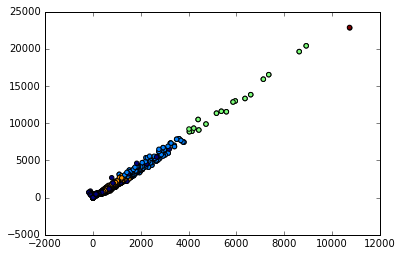

In [58]:
import numpy as np

game_mean = numeric_columns.apply(np.mean, axis = 1)
game_std = numeric_columns.apply(np.std, axis = 1)

plt.scatter(game_mean, game_std, c=labels)
plt.show()

# Game clusters

It looks like most of the games are similar, but as the game attributes tend to increase in value (such as number of users who rated), there are fewer high quality games. So most games don't get played much, but a few get a lot of players.

In [59]:
correlations = numeric_columns.corr()

print (correlations)


                      yearpublished  minplayers  maxplayers  playingtime  \
yearpublished              1.000000    0.004308    0.004977     0.006235   
minplayers                 0.004308    1.000000    0.037155     0.024320   
maxplayers                 0.004977    0.037155    1.000000    -0.001020   
playingtime                0.006235    0.024320   -0.001020     1.000000   
minplaytime                0.005245    0.026569   -0.000950     0.967909   
maxplaytime                0.006235    0.024320   -0.001020     1.000000   
minage                     0.125281    0.110886    0.004508     0.053471   
users_rated                0.037454    0.020364   -0.000858     0.010908   
average_rating             0.108461   -0.032701   -0.008335     0.048994   
bayes_average_rating       0.140998    0.034915   -0.003437     0.045341   
total_owners               0.047740    0.014594   -0.000977     0.014532   
total_traders              0.064403    0.024708   -0.002381     0.019264   
total_wanter

# Correlations

The yearpublished column is surprisingly highly correlated with average_rating, showing that more recent games tend to be rated more highly. Games for older players (minage is high) tend to be more highly rated. The more "weighty" a game is (average_weight is high), the more highly it tends to be rated.

In [60]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(board_games[numeric_columns.columns], board_games['average_rating'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
predictions = reg.predict(board_games[numeric_columns.columns])
print(predictions)

[ 8.33774  8.28798  8.28994 ...,  8.       7.       7.     ]


In [62]:
board_games['predicted_ratings'] = predictions
board_games.head()

id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage        ...          average_rating  \
0        180.0    13.0        ...                 8.33774   
1        150.0    12.0        ...                 8.28798   
2        210.0    12.0        ...                 8.28994   
3        240.0    12.0        ...                 8.20407   
4        150.0    12.0        ...                 8.14261   

   bayes_average_rating  total_owners  total_traders  total_wanters  \
0               8.22186         26647            372           1219   
1               8.14232         16519            132           1586   
2               8.06886         12230             99           1476   
3               8.05804         14343            362           1084   
4               8.04524         44362            795            861   

   total_wishers  total_comments  total_weights  average_weight  \
0           5865            5347           2562          3.4785   
1           6277            2526           1423          3.8939   
2           5600            1700            777          3.7761   
3           5075            3378           1642          4.1590   
4           5414            9173           5213          3.2943   

   predicted_ratings  
0            8.33774  
1            8.28798  
2            8.28994  
3            8.20407  
4            8.14261  

[5 rows x 21 columns]

In [64]:
# Claculating Root MeanSquare Error
mean_square_error = np.mean((board_games['predicted_ratings'] - board_games['average_rating']) ** 2)
rms = mean_square_error ** 0.5
print('Mean Square Error: ', mean_square_error)
print('Root Mean Square Error: ', rms)

Mean Square Error:  2.80821466284e-28
Root Mean Square Error:  1.67577285538e-14
